In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_data = pd.read_csv("Train_Data.csv", encoding='utf-8')
test_data = pd.read_csv("Test_Data.csv", encoding='utf-8')
train_data.shape, test_data.shape

((4000, 21), (400, 19))

In [ ]:
train_data.head()

date  number of rooms  security level of the community  \
0  2/5/2014 0:00                5                             2.50   
1  2/5/2014 0:00                2                             1.00   
2  2/5/2014 0:00                4                             2.50   
3  2/5/2014 0:00                3                             1.50   
4  2/5/2014 0:00                3                             1.75   

   residence space  building space  noise level  waterfront  view  \
0             2820           67518          2.0           0     0   
1             1210            9400          1.0           0     0   
2             2200            9397          2.0           0     0   
3             1200            9720          1.0           0     0   
4             1370            5858          1.0           0     0   

   air quality level  aboveground space   ...  building year  decoration year  \
0                  3                2820  ...           1979             2014   
1                  2                1210  ...           1949                0   
2                  3                2200  ...           1987             2000   
3                  4                1200  ...           1965                0   
4                  3                1370  ...           1987             2000   

            district        city  zip code region exchange rate  \
0  23525 SE 32nd Way    Issaquah  WA 98029    USA      6.784830   
1   7542 21st Ave SW     Seattle  WA 98106    USA      6.243129   
2    5214 S 292nd St      Auburn  WA 98001    USA      6.010127   
3  14034 SE 201st St        Kent  WA 98042    USA      7.560375   
4    1605 S 245th Pl  Des Moines  WA 98198    USA      6.543941   

   unit price of residence space  unit price of building space   total cost  
0                      11.886409                      0.977028  675000.0001  
1                      25.681414                      0.698603  235000.0000  
2                      16.921174                      0.238882  237227.8571  
3                      19.632230                      0.876178  242499.9999  
4                      28.205930                      0.132472  257950.0000  

[5 rows x 21 columns]

In [ ]:
train_data.describe()

number of rooms  security level of the community  residence space  \
count       4000.00000                      4000.000000      4000.000000   
mean           3.43200                         2.173313      2138.398500   
std            0.87668                         0.750017       902.790205   
min            0.00000                         0.000000       430.000000   
25%            3.00000                         1.750000      1500.000000   
50%            3.00000                         2.250000      1990.000000   
75%            4.00000                         2.500000      2600.000000   
max            9.00000                         8.000000     13540.000000   

       building space  noise level   waterfront         view  \
count     4000.000000  4000.000000  4000.000000  4000.000000   
mean     11604.189250     1.514750     0.003250     0.197750   
std      18085.067501     0.539773     0.056923     0.700905   
min        747.000000     1.000000     0.000000     0.000000   
25%       5100.750000     1.000000     0.000000     0.000000   
50%       7696.500000     1.500000     0.000000     0.000000   
75%      10666.750000     2.000000     0.000000     0.000000   
max     307752.000000     3.500000     1.000000     4.000000   

       air quality level  aboveground space   basement space  building year  \
count        4000.000000         4000.000000     4000.000000    4000.000000   
mean            3.434500         1825.351000      313.047500    1972.963750   
std             0.661301          827.224024      455.737621      28.485308   
min             1.000000          430.000000        0.000000    1900.000000   
25%             3.000000         1200.000000        0.000000    1954.000000   
50%             3.000000         1600.000000        0.000000    1977.000000   
75%             4.000000         2310.000000      620.000000    1998.000000   
max             5.000000         9410.000000     4130.000000    2014.000000   

       decoration year  exchange rate  unit price of residence space  \
count        4000.0000    4000.000000                    4000.000000   
mean          788.2935       7.011697                      32.085272   
std           975.2979       0.579323                      11.539696   
min             0.0000       6.000760                      10.943531   
25%             0.0000       6.519045                      22.643236   
50%             0.0000       7.027479                      31.402449   
75%          1999.0000       7.513011                      40.664300   
max          2014.0000       7.999738                      58.250941   

       unit price of building space    total cost  
count                   4000.000000  4.000000e+03  
mean                       0.499263  5.106757e+05  
std                        0.286748  2.724016e+05  
min                        0.000427  8.000000e+04  
25%                        0.253991  3.200000e+05  
50%                        0.499795  4.500000e+05  
75%                        0.750673  6.262500e+05  
max                        0.999996  2.888000e+06

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             4000 non-null   object 
 1   number of rooms                  4000 non-null   int64  
 2   security level of the community  4000 non-null   float64
 3   residence space                  4000 non-null   int64  
 4   building space                   4000 non-null   int64  
 5   noise level                      4000 non-null   float64
 6   waterfront                       4000 non-null   int64  
 7   view                             4000 non-null   int64  
 8   air quality level                4000 non-null   int64  
 9   aboveground space                4000 non-null   int64  
 10  basement space                   4000 non-null   int64  
 11  building year                    4000 non-null   int64  
 12  decoration year     

In [ ]:
train_data.drop(['unit price of residence space', 'unit price of building space'], axis=1, inplace=True)
train_data.columns

Index(['date', 'number of rooms', 'security level of the community',
       'residence space', 'building space', 'noise level', 'waterfront',
       'view', 'air quality level', 'aboveground space ', 'basement space',
       'building year', 'decoration year', 'district', 'city', 'zip code',
       'region', 'exchange rate', 'total cost'],
      dtype='object')

In [ ]:
train_data['total_cost_category'] = pd.cut(train_data['total cost'], 
                                     bins=[-1, 300000, 500000, 700000, float('inf')], 
                                     labels=[0, 1, 2, 3])
train_data.head()

date  number of rooms  security level of the community  \
0  2/5/2014 0:00                5                             2.50   
1  2/5/2014 0:00                2                             1.00   
2  2/5/2014 0:00                4                             2.50   
3  2/5/2014 0:00                3                             1.50   
4  2/5/2014 0:00                3                             1.75   

   residence space  building space  noise level  waterfront  view  \
0             2820           67518          2.0           0     0   
1             1210            9400          1.0           0     0   
2             2200            9397          2.0           0     0   
3             1200            9720          1.0           0     0   
4             1370            5858          1.0           0     0   

   air quality level  aboveground space   basement space  building year  \
0                  3                2820               0           1979   
1                  2                1210               0           1949   
2                  3                2200               0           1987   
3                  4                1200               0           1965   
4                  3                1370               0           1987   

   decoration year           district        city  zip code region  \
0             2014  23525 SE 32nd Way    Issaquah  WA 98029    USA   
1                0   7542 21st Ave SW     Seattle  WA 98106    USA   
2             2000    5214 S 292nd St      Auburn  WA 98001    USA   
3                0  14034 SE 201st St        Kent  WA 98042    USA   
4             2000    1605 S 245th Pl  Des Moines  WA 98198    USA   

   exchange rate   total cost total_cost_category  
0       6.784830  675000.0001                   2  
1       6.243129  235000.0000                   0  
2       6.010127  237227.8571                   0  
3       7.560375  242499.9999                   0  
4       6.543941  257950.0000                   0

total_cost_category
0     856
1    1481
2     936
3     727
Name: date, dtype: int64


<Axes: xlabel='total_cost_category', ylabel='count'>

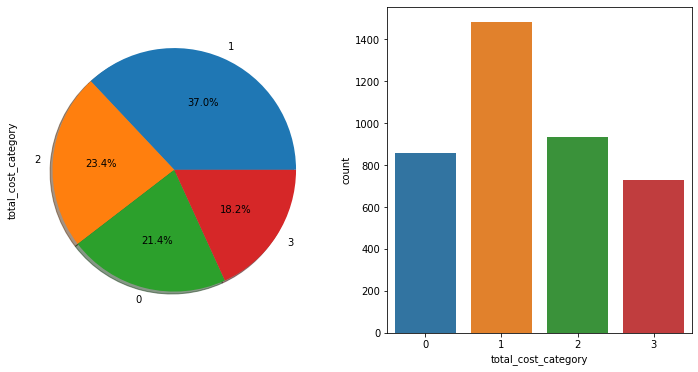

In [ ]:
print(train_data.groupby(['total_cost_category'])['date'].count())

_, ax = plt.subplots(1, 2, figsize=(12, 6))

train_data.total_cost_category.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, ax=ax[0])
sns.countplot(x='total_cost_category', data=train_data, ax=ax[1])

In [ ]:
object_list = []
numerical_list = []

for col in (train_data.columns):
    if train_data[col].dtype == "object":
        object_list.append(col)
    else:
        numerical_list.append(col)
print("numerical columns = ", numerical_list)
print("object columns = ", object_list)

numerical columns =  ['number of rooms', 'security level of the community', 'residence space', 'building space', 'noise level', 'waterfront', 'view', 'air quality level', 'aboveground space ', 'basement space', 'building year', 'decoration year', 'exchange rate', 'total cost', 'total_cost_category']
object columns =  ['date', 'district', 'city', 'zip code', 'region']


In [ ]:
for col in object_list:
  col_name = str(col)
  length = len(train_data[col_name].unique())
  train_data[col_name].value_counts(normalize = True)
  print("unique counts of {0}:{1}".format(col_name, length))
  print("********")

unique counts of date:70
********
unique counts of district:3939
********
unique counts of city:42
********
unique counts of zip code:77
********
unique counts of region:1
********


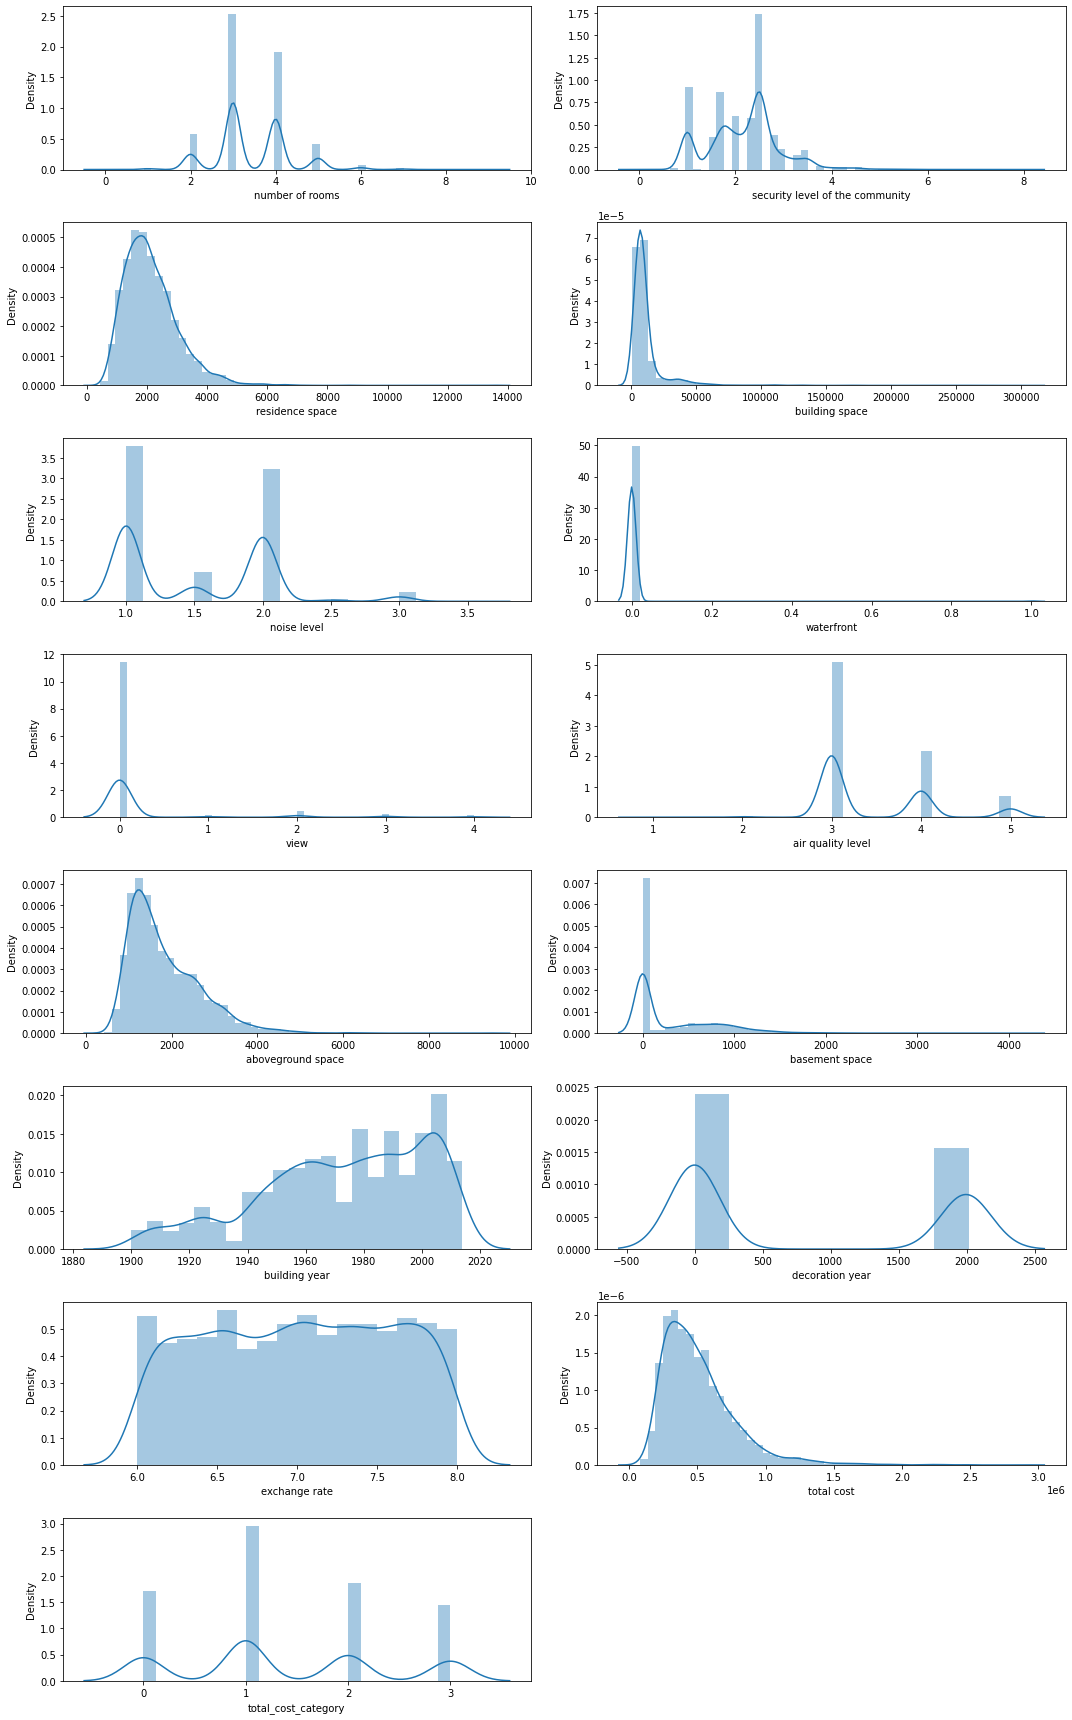

In [ ]:
import math

n = 2
plt.figure(figsize=[15, 3*math.ceil(len(numerical_list)/n)])

for i in range(len(numerical_list)):
    plt.subplot(math.ceil(len(numerical_list)/n), n, i+1)
    sns.distplot(train_data[numerical_list[i]])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Pearson correlation of Features')

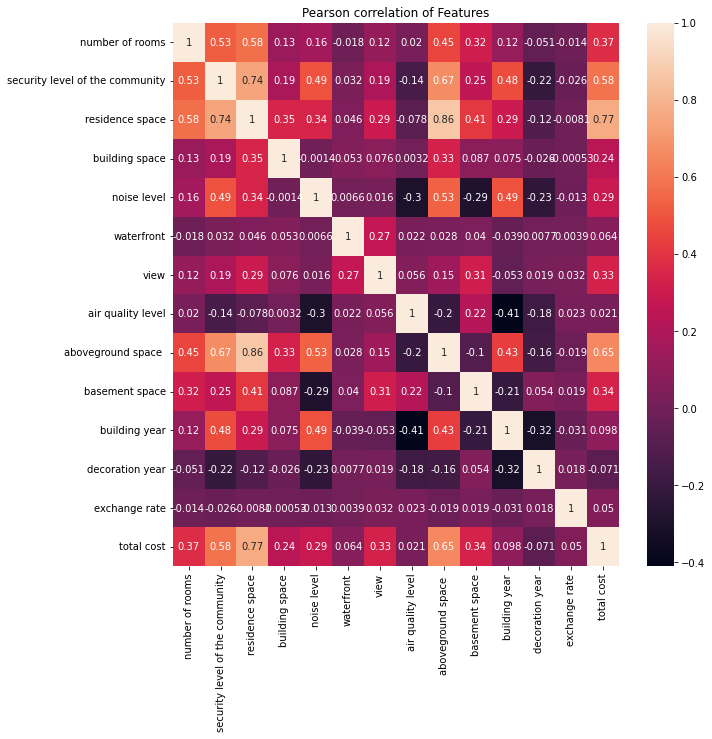

In [ ]:
corr = train_data.corr()
_, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True)
plt.title("Pearson correlation of Features")

In [ ]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
y_train = train_data.total_cost_category.values
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)
all_data.drop(['total cost', 'total_cost_category', 'date', 'region'], axis=1, inplace=True)
all_data.columns

Index(['number of rooms', 'security level of the community', 'residence space',
       'building space', 'noise level', 'waterfront', 'view',
       'air quality level', 'aboveground space ', 'basement space',
       'building year', 'decoration year', 'district', 'city', 'zip code',
       'exchange rate'],
      dtype='object')

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number of rooms                  4400 non-null   int64  
 1   security level of the community  4400 non-null   float64
 2   residence space                  4400 non-null   int64  
 3   building space                   4400 non-null   int64  
 4   noise level                      4400 non-null   float64
 5   waterfront                       4400 non-null   int64  
 6   view                             4400 non-null   int64  
 7   air quality level                4400 non-null   int64  
 8   aboveground space                4400 non-null   int64  
 9   basement space                   4400 non-null   int64  
 10  building year                    4400 non-null   int64  
 11  decoration year                  4400 non-null   int64  
 12  district            

In [ ]:
all_data['security level of the community'] = all_data['security level of the community'].apply(str)
all_data['noise level'] = all_data['noise level'].astype(str)
all_data['air quality level'] = all_data['air quality level'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['security level of the community', 'noise level', 
       'air quality level']

for c in cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(list(all_data[c].values))
    all_data[c] = label_encoder.transform(list(all_data[c].values)) 

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import CountEncoder

col = all_data['district']
counter_encoder = CountEncoder()
all_data['district'] = counter_encoder.fit_transform(all_data['district'])

In [ ]:
all_data = pd.get_dummies(all_data)
all_data.describe()

number of rooms  security level of the community  residence space  \
count      4400.000000                      4400.000000      4400.000000   
mean          3.395682                         6.627955      2124.179091   
std           0.904149                         3.088671       948.889105   
min           0.000000                         0.000000       370.000000   
25%           3.000000                         5.000000      1460.000000   
50%           3.000000                         7.000000      1970.000000   
75%           4.000000                         8.000000      2600.000000   
max           9.000000                        25.000000     13540.000000   

       building space  noise level   waterfront         view  \
count     4400.000000  4400.000000  4400.000000  4400.000000   
mean     11221.817727     1.031818     0.006818     0.232500   
std      17439.891332     1.080689     0.082300     0.763028   
min        638.000000     0.000000     0.000000     0.000000   
25%       5000.000000     0.000000     0.000000     0.000000   
50%       7509.000000     1.000000     0.000000     0.000000   
75%      10468.000000     2.000000     0.000000     0.000000   
max     307752.000000     5.000000     1.000000     4.000000   

       air quality level  aboveground space   basement space  ...  \
count        4400.000000         4400.000000     4400.000000  ...   
mean            2.451818         1813.345000      310.834091  ...   
std             0.674577          847.736888      461.180155  ...   
min             0.000000          370.000000        0.000000  ...   
25%             2.000000         1180.000000        0.000000  ...   
50%             2.000000         1582.000000        0.000000  ...   
75%             3.000000         2290.000000      600.000000  ...   
max             4.000000         9410.000000     4820.000000  ...   

       zip code_WA 98155  zip code_WA 98166  zip code_WA 98168  \
count        4400.000000        4400.000000        4400.000000   
mean            0.019545           0.012727           0.013636   
std             0.138448           0.112108           0.115989   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.000000   
max             1.000000           1.000000           1.000000   

       zip code_WA 98177  zip code_WA 98178  zip code_WA 98188  \
count        4400.000000        4400.000000        4400.000000   
mean            0.011818           0.010227           0.004545   
std             0.108079           0.100623           0.067274   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.000000   
max             1.000000           1.000000           1.000000   

       zip code_WA 98198  zip code_WA 98199  zip code_WA 98288  \
count        4400.000000        4400.000000        4400.000000   
mean            0.011136           0.015227           0.000455   
std             0.104952           0.122470           0.021318   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.000000   
max             1.000000           1.000000           1.000000   

       zip code_WA 98354  
count        4400.000000  
mean            0.000455  
std             0.021318  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 135 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

all_data_norm = scaler.fit_transform(all_data)

all_data = pd.DataFrame(all_data_norm, columns=all_data.columns)

In [ ]:
all_data.describe()
print(all_data.shape)

(4400, 135)


In [ ]:
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, Dataset

import torch.nn.functional as F

In [ ]:
X_train_array = X_train.to_numpy()
y_train_array = y_train.to_numpy()

In [ ]:
X_train_tensor = torch.tensor(X_train_array, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_array)

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(135, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.5)
        self.linear2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.3)
        self.linear3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.1)
        self.linear4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.dropout4 = nn.Dropout(0.1)
        self.linear5 = nn.Linear(32, 4)
        
    def forward(self, x):
        x = x.view(-1, 135)
        x = self.dropout1(F.relu(self.bn1(self.linear1(x))))
        x = self.dropout2(F.relu(self.bn2(self.linear2(x))))
        x = self.dropout3(F.relu(self.bn3(self.linear3(x))))
        x = self.dropout4(F.relu(self.bn4(self.linear4(x))))
        return self.linear5(x)

model = Model()

In [ ]:
class FederatedDataset(Dataset):
    def __init__(self, X, y, device):
        self.X = X
        self.y = y
        self.device = device
        
    def __getitem__(self, index):
        X, y = self.X[index], self.y[index]
        return torch.tensor(X).to(torch.float32), torch.tensor(y).to(torch.long)
    
    def __len__(self):
        return len(self.X)

def split_data(X, y, num_clients):
    data_per_client = len(X) // num_clients
    data_splits = []
    
    for i in range(num_clients):
        start_idx = i * data_per_client
        end_idx = (i+1) * data_per_client if i < num_clients - 1 else len(X)
        data_splits.append((X[start_idx:end_idx], y[start_idx:end_idx]))
    
    print("split data finish")
    return data_splits

def get_data_loaders(data_splits, batch_size, device):
    loaders = []
    
    for X, y in data_splits:
        dataset = FederatedDataset(X, y, device)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        loaders.append(loader)
    
    print("get data loaders finish")
    return loaders


In [ ]:
# def train(model, device, train_loader, optimizer, epoch):
#     model.train()

#     for batch_idx, (data, target) in enumerate(train_loader):
#         data, target = data.to(device), target.to(device)
#         optimizer.zero_grad()
#         output = model(data)
#         loss = nn

def train(model, device, train_loader, optimizer, epoch):
    loss_sum = 0
    total_correct = 0
    total_samples = 0
    model.train()
    print("begin train")

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        
        output = model(data)

        loss = nn.CrossEntropyLoss()(output, target)
        loss.backward()
        optimizer.step()
        
        loss_sum += loss.item()
        
        _, predicted = torch.max(output, 1)
        total_correct += (predicted == target).sum().item()
        total_samples += target.size(0)
        batch_acc = 100.0 * total_correct / total_samples
        
        
        if batch_idx % 10 == 9:
            print('Train Epoch:{} [{}/{} ({:.0f}%)]\tLoss:{:.2f}'.format(epoch + 1, batch_idx * len(data), len(train_loader.dataset), 100.* batch_idx / len(train_loader), loss_sum))
            loss_sum = 0.0
            
    train_acc = 100.0 * total_correct / total_samples
    print('Epoch %d, training accuracy: %.3f%%' % (epoch + 1, train_acc))
    print('Finished Training')


In [ ]:
batch_size = 64

num_clients = 4

num_epochs = 50

data_splits = split_data(X_train_array, y_train_array, num_clients)

model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.CrossEntropyLoss()

# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# train_loader = DataLoader(dataset=train_dataset, 
#               batch_size=batch_size,
#               shuffle=True,
#               )

split data finish


In [ ]:
loaders = get_data_loaders(data_splits, batch_size, 'cpu')


get data loaders finish


In [ ]:
for epoch in range(1, num_epochs + 1):
    for i, train_loader in enumerate (loaders):
        train(model, 'cpu', loaders[i], optimizer, epoch)

begin train
Train Epoch:2 [576/1000 (56%)]	Loss:14.90
Epoch 2, training accuracy: 23.800%
Finished Training
begin train
Train Epoch:2 [576/1000 (56%)]	Loss:13.43
Epoch 2, training accuracy: 37.100%
Finished Training
begin train
Train Epoch:2 [576/1000 (56%)]	Loss:12.41
Epoch 2, training accuracy: 47.500%
Finished Training
begin train
Train Epoch:2 [576/1000 (56%)]	Loss:11.25
Epoch 2, training accuracy: 53.400%
Finished Training
begin train
Train Epoch:3 [576/1000 (56%)]	Loss:10.63
Epoch 3, training accuracy: 57.300%
Finished Training
begin train
Train Epoch:3 [576/1000 (56%)]	Loss:10.04
Epoch 3, training accuracy: 60.500%
Finished Training
begin train
Train Epoch:3 [576/1000 (56%)]	Loss:8.93
Epoch 3, training accuracy: 63.800%
Finished Training
begin train
Train Epoch:3 [576/1000 (56%)]	Loss:8.82
Epoch 3, training accuracy: 62.700%
Finished Training
begin train
Train Epoch:4 [576/1000 (56%)]	Loss:8.47
Epoch 4, training accuracy: 65.900%
Finished Training
begin train
Train Epoch:4 [576/

In [ ]:
# def random_split_dataset(X, y, num_splits=4):
#     # 将数据集打乱
#     idx = np.random.permutation(len(X))
#     X, y = X[idx], y[idx]

#     # 计算每个子集的大小
#     subset_size = len(X) // num_splits

#     # 分割数据集
#     X_splits = []
#     y_splits = []
#     for i in range(num_splits):
#         if i == num_splits - 1:
#             X_subset = X[i * subset_size:]
#             y_subset = y[i * subset_size:]
#         else:
#             X_subset = X[i * subset_size:(i+1) * subset_size]
#             y_subset = y[i * subset_size:(i+1) * subset_size]
#         X_splits.append(X_subset)
#         y_splits.append(y_subset)

#     return X_splits, y_splits

In [ ]:
# X_splits, y_splits = random_split_dataset(X_train_array, y_train_array)

In [ ]:
# import copy

In [ ]:
# def federated_learning(num_rounds, net, train_loaders, optimizer, criterion):
#     loss_sum = 0
#     total_correct = 0
#     total_samples = 0

#     global_model = net ()
    
#     # Step 2: 模型训练
#     for i in range(num_rounds):
#         optimizer.zero_grad()
#         print("Round:", i+1)

#         global_model.train()
#         optimizer.zero_grad()

#         local_models = []
#         num_participants = len(train_loaders)

#         for j, train_loader in enumerate(train_loaders):
#             print("Participant:", j+1)
#             local_model = copy.deepcopy(global_model)
#             for inputs, labels in train_loader:
#                 optimizer.zero_grad()
#                 output = local_model(inputs)
#                 loss = criterion(output, labels)
#                 loss.backward()
#                 optimizer.step()
#                 loss_sum += loss.item()
#                 total_correct += (output.argmax(dim=1)== labels).sum().item()
#                 total_samples += labels.size(0)
#             # 将更新后的模型参数传递给联邦服务器
#             local_models.append(local_model)
        
#         # Step 3: 参数聚合
#         for param in global_model.parameters():
#             param.data = torch.zeros_like(param.data)
#         for i in range(len(local_models)):
#             num_samples = len( train_loaders[i].dataset)
#             for name, param in local_models[i].named_parameters():
#                 global_model.state_dict()[name].add_(param.data * num_samples / total_samples)
        
#         # Step 4: 模型发布
#         global_state_dict= global_model.state_dict()
#         for i in range(len(train_loaders)):
#           local_model = net()
#           local_model.load_state_dict(global_state_dict)
#           train_loaders[i]["model"] = local_model



#     train_acc = 100.0 * total_correct / total_samples
#     print('Epoch %d, training accuracy: %.3f%%' % (i + 1, train_acc))
#     print('Finished Training')

In [ ]:
class FederatedDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
# 将训练数据集分配给各个参与方
train_loader1 = DataLoader(dataset=FederatedDataset(X_splits[0], y_splits[0]), batch_size=64, shuffle=True)
train_loader2 = DataLoader(dataset=FederatedDataset(X_splits[1], y_splits[1]), batch_size=64, shuffle=True)
train_loader3 = DataLoader(dataset=FederatedDataset(X_splits[2], y_splits[2]), batch_size=64, shuffle=True)
train_loader4 = DataLoader(dataset=FederatedDataset(X_splits[3], y_splits[3]), batch_size=64, shuffle=True)

# 将所有参与方的数据加载器组成列表
train_loaders = [train_loader1, train_loader2, train_loader3, train_loader4]

# 初始化神经网络模型、优化器和损失函数
net = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# 进行联邦学习
federated_learning(num_rounds=50, net=net, train_loaders=train_loaders, optimizer=optimizer, criterion=criterion)

TypeError: ignored

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

In [ ]:
from sklearn.metrics import accuracy_score

def train(epoch):
    loss_sum = 0
    total_correct = 0
    total_samples = 0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        loss_sum += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        batch_acc = 100.0 * total_correct / total_samples
        
        
        if i % 10 == 9:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, loss_sum / 100))
            loss_sum = 0.0
            
    train_acc = 100.0 * total_correct / total_samples
    print('Epoch %d, training accuracy: %.3f%%' % (epoch + 1, train_acc))
    scheduler.step()
    print('Finished Training')

# New Section

In [ ]:
X_test_array = X_test.to_numpy()

X_test_tensor = torch.tensor(X_test_array, dtype=torch.float32)

In [ ]:
def test():
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        y_pred = y_pred.argmax(dim=1).numpy()
        
        result_df = pd.DataFrame({'y_pred':y_pred})
        result_df['y_pred'] = result_df['y_pred'] + 1
        result_df.to_csv("test_results.csv", index=False)
        
    print("Finished Testing")

In [ ]:
if __name__ == '__main__':
    for epoch in range(50):
        train(epoch)
        test()

[1,    10] loss: 0.147
[1,    20] loss: 0.140
[1,    30] loss: 0.131
[1,    40] loss: 0.127
[1,    50] loss: 0.126
[1,    60] loss: 0.117
Epoch 1, training accuracy: 40.500%
Finished Training
Finished Testing
[2,    10] loss: 0.094
[2,    20] loss: 0.082
[2,    30] loss: 0.068
[2,    40] loss: 0.074
[2,    50] loss: 0.064
[2,    60] loss: 0.068
Epoch 2, training accuracy: 69.800%
Finished Training
Finished Testing
[3,    10] loss: 0.066
[3,    20] loss: 0.061
[3,    30] loss: 0.065
[3,    40] loss: 0.058
[3,    50] loss: 0.061
[3,    60] loss: 0.053
Epoch 3, training accuracy: 74.000%
Finished Training
Finished Testing
[4,    10] loss: 0.055
[4,    20] loss: 0.052
[4,    30] loss: 0.054
[4,    40] loss: 0.054
[4,    50] loss: 0.054
[4,    60] loss: 0.056
Epoch 4, training accuracy: 77.200%
Finished Training
Finished Testing
[5,    10] loss: 0.054
[5,    20] loss: 0.045
[5,    30] loss: 0.057
[5,    40] loss: 0.054
[5,    50] loss: 0.051
[5,    60] loss: 0.053
Epoch 5, training accuracy

[39,    60] loss: 0.023
Epoch 39, training accuracy: 90.100%
Finished Training
Finished Testing
[40,    10] loss: 0.027
[40,    20] loss: 0.026
[40,    30] loss: 0.027
[40,    40] loss: 0.022
[40,    50] loss: 0.023
[40,    60] loss: 0.028
Epoch 40, training accuracy: 90.150%
Finished Training
Finished Testing
[41,    10] loss: 0.026
[41,    20] loss: 0.022
[41,    30] loss: 0.025
[41,    40] loss: 0.025
[41,    50] loss: 0.026
[41,    60] loss: 0.029
Epoch 41, training accuracy: 90.125%
Finished Training
Finished Testing
[42,    10] loss: 0.026
[42,    20] loss: 0.023
[42,    30] loss: 0.026
[42,    40] loss: 0.029
[42,    50] loss: 0.023
[42,    60] loss: 0.026
Epoch 42, training accuracy: 90.150%
Finished Training
Finished Testing
[43,    10] loss: 0.024
[43,    20] loss: 0.029
[43,    30] loss: 0.025
[43,    40] loss: 0.028
[43,    50] loss: 0.024
[43,    60] loss: 0.022
Epoch 43, training accuracy: 90.150%
Finished Training
Finished Testing
[44,    10] loss: 0.023
[44,    20] loss

In [ ]:
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.pipeline import make_pipeline
# from sklearn.linear_model import LogisticRegression 
# from sklearn.svm import SVC
# # from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.preprocessing import StandardScaler
# # from xgboost import XGBClassifier
# # from mlxtend.classifier import StackingCVClassifier

In [ ]:
# n_folds = 10

# def cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
#     accuracy = cross_val_score(model, X_train.values, y_train, scoring="accuracy", cv=kf)
#     precision = cross_val_score(model, X_train.values, y_train, scoring="precision_macro", cv=kf)
#     recall = cross_val_score(model, X_train.values, y_train, scoring="recall_macro", cv=kf)
#     f1 = cross_val_score(model, X_train.values, y_train, scoring="f1_macro", cv=kf)
#     return(accuracy, precision, recall, f1)

In [ ]:
# softmax = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=1))


# svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', decision_function_shape='ovr', random_state=1))
# # rf = RandomForestClassifier(n_estimators=600,
# #                              max_depth=15,
#                              min_samples_split=5,
#                              min_samples_leaf=5,
#                              max_features=None,
#                              oob_score=True,
#                              random_state=42)

# xgb = XGBClassifier(learning_rate=0.01,
#                         n_estimators=600,
#                         max_depth=4,
#                         min_child_weight=0,
#                         gamma=0.6,
#                         subsample=0.7,
#                         colsample_bytree=0.7,
#                         objective='multi:softmax',
#                         num_class=4,
#                         nthread=-1,
#                         scale_pos_weight=1,
#                         seed=27,
#                         reg_alpha=0.00006,
#                         random_state=42)

# stack_gen = StackingCVClassifier(classifiers=[softmax, rf, xgb],
#                                 meta_classifier=xgb,
#                                 use_features_in_secondary=True)

In [ ]:
# models = [softmax, svm]
# model_names = ['SoftMax', 'SVM']

# accuracy_dic = {}
# precision_dic = {}
# recall_dic = {}
# f1_dic = {}

# for i, model in enumerate(models):
#     print(f"Evaluating {model_names[i]}...")
#     accuracy, precision, recall, f1 = cv(model)
#     accuracy_dic[model_names[i]] = accuracy
#     precision_dic[model_names[i]] = precision
#     recall_dic[model_names[i]] = recall
#     f1_dic[model_names[i]] = f1

# print("Evaluation complete.")

In [ ]:
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
# keys = ['SoftMax', 'SVM']
# values = [accuracy_dic, precision_dic, recall_dic, f1_dic]

# for i, metric in enumerate(metrics):
#     plt.figure(figsize=(8, 6))
#     for key in keys:
#         plt.plot(list(range(1, 11)), values[i][key], label=key)
#     plt.title(metric + ' Comparison')
#     plt.xlabel('Fold')
#     plt.ylabel(metric)
#     plt.legend()
#     plt.show()

In [ ]:
# softmax.fit(X_train.values, y_train)
# softmax_pred= softmax.predict(X_test.values)

# pred = pd.DataFrame()
# pred['total_cost_category'] = softmax_pred
# pred.to_csv('pred.csv',index=False)